# Project03:#

# Part 1 #
### A ### 
The population for this process is the chemical processes being run by the company.  The sample size is the number of times that the process is run, in this case: n=20 times.
The parameter of interest is the yield of the chemical process.

### B ###
The population for this process is the registered voters in michigan.  The population size is the number of voters in Michigan, while the sample size is the n=1000 voters that the pollster surveyed.  
The parameter of interest is the candidtate that the surveyed voters voted for.

### C ###
The population for this process is people with high cholesterol levels.  The population size is the number of people with high cholesterol, while the sample size is the n=100 people with high cholesterol.
The parameter of interest is the effect of this new drug on cholesterol levels.

### D ###
The population for this process is concrete polymers.  The sample size is the n=8 polymers which were produced to be used in a new formulation.
The parameter of interest is the comprehensive strength of the polymers.

### E ###
The population for this process is the bolts manufactured on any given day.  The population size is the number of bolts which are produced each day, while the sample size is the last n=100 bolts which are produced after 3pm on a given day.
The parameter of interest is the strength of the bolts produced on a given day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
concrete = pd.read_csv("data/concrete.csv")
df = pd.DataFrame(data= concrete)
df.columns = ['Cement', 'Slag', 'Ash', 'Water', 'Splasticizer', 'C_Aggregate', 'F_Aggregate', 'Age', 'C_C_Strength']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement          1030 non-null float64
Slag            1030 non-null float64
Ash             1030 non-null float64
Water           1030 non-null float64
Splasticizer    1030 non-null float64
C_Aggregate     1030 non-null float64
F_Aggregate     1030 non-null float64
Age             1030 non-null int64
C_C_Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Part  2 #
## A ##

In [4]:
# quantile 1 for each Cement Variable
q1Cem = df['Cement'].quantile(0.25)
q1Slg = df['Slag'].quantile(0.25)
q1Ash = df['Ash'].quantile(0.25)
q1Wat = df['Water'].quantile(0.25)
q1Spl = df['Splasticizer'].quantile(0.25)
q1Cag = df['C_Aggregate'].quantile(0.25)
q1Fia = df['F_Aggregate'].quantile(0.25)
q1Age = df['Age'].quantile(0.25)
q1CCS = df['C_C_Strength'].quantile(0.25)

# median for each Cement Variable
medCem = df['Cement'].median()
medSlg = df['Slag'].median()
medAsh = df['Ash'].median()
medWat = df['Water'].median()
medSpl = df['Splasticizer'].median()
medCag = df['C_Aggregate'].median()
medFia = df['F_Aggregate'].median()
medAge = df['Age'].median()
medCCS = df['C_C_Strength'].median()

# mean for each Cement Variable
meanCem = df['Cement'].mean()
meanSlg = df['Slag'].mean()
meanAsh = df['Ash'].mean()
meanWat = df['Water'].mean()
meanSpl = df['Splasticizer'].mean()
meanCag = df['C_Aggregate'].mean()
meanFia = df['F_Aggregate'].mean()
meanAge = df['Age'].mean()
meanCCS = df['C_C_Strength'].mean()

# quantile 3 for each Cement Variable
q3Cem = df['Cement'].quantile(0.75)
q3Slg = df['Slag'].quantile(0.75)
q3Ash = df['Ash'].quantile(0.75)
q3Wat = df['Water'].quantile(0.75)
q3Spl = df['Splasticizer'].quantile(0.75)
q3Cag = df['C_Aggregate'].quantile(0.75)
q3Fia = df['F_Aggregate'].quantile(0.75)
q3Age = df['Age'].quantile(0.75)
q3CCS = df['C_C_Strength'].quantile(0.75)

# IQR for each Cement Variable
iqrCem = q3Cem-q1Cem
iqrSlg = q3Slg-q1Slg
iqrAsh = q3Ash-q1Ash
iqrWat = q3Wat-q1Wat
iqrSpl = q3Spl-q1Spl
iqrCag = q3Cag-q1Cag
iqrFia = q3Fia-q1Fia
iqrAge = q3Age-q1Age
iqrCCS = q3CCS-q1CCS

# Moderate outlier boundaries for each Cement Variable
moCem = [q1Cem - 1.5*iqrCem, q3Cem + 1.5*iqrCem]
moSlg = [q1Slg - 1.5*iqrSlg, q3Slg + 1.5*iqrSlg]
moAsh = [q1Ash - 1.5*iqrAsh, q3Ash + 1.5*iqrAsh]
moWat = [q1Wat - 1.5*iqrWat, q3Wat + 1.5*iqrWat]
moSpl = [q1Spl - 1.5*iqrSpl, q3Spl + 1.5*iqrSpl]
moCag = [q1Cag - 1.5*iqrCag, q3Cag + 1.5*iqrCag]
moFia = [q1Fia - 1.5*iqrFia, q3Fia + 1.5*iqrFia]
moAge = [q1Age - 1.5*iqrAge, q3Age + 1.5*iqrAge]
moCCS = [q1CCS - 1.5*iqrCCS, q3CCS + 1.5*iqrCCS]

# Extreme outliers boundaries for each Cement Variable
eoCem = [q1Cem - 3*iqrCem, q3Cem + 3*iqrCem]
eoSlg = [q1Slg - 3*iqrSlg, q3Slg + 3*iqrSlg]
eoAsh = [q1Ash - 3*iqrAsh, q3Ash + 3*iqrAsh]
eoWat = [q1Wat - 3*iqrWat, q3Wat + 3*iqrWat]
eoSpl = [q1Spl - 3*iqrSpl, q3Spl + 3*iqrSpl]
eoCag = [q1Cag - 3*iqrCag, q3Cag + 3*iqrCag]
eoFia = [q1Fia - 3*iqrFia, q3Fia + 3*iqrFia]
eoAge = [q1Age - 3*iqrAge, q3Age + 3*iqrAge]
eoCCS = [q1CCS - 3*iqrCCS, q3CCS + 3*iqrCCS]

# Upper outlier boundaries
uobCem = [q3Cem + 1.5*iqrCem, q3Cem + 3*iqrCem]
uobSlg = [q3Slg + 1.5*iqrSlg, q3Slg + 3*iqrSlg]
uobAsh = [q3Ash + 1.5*iqrAsh, q3Ash + 3*iqrAsh]
uobWat = [q3Wat + 1.5*iqrWat, q3Wat + 3*iqrWat]
uobSpl = [q3Spl + 1.5*iqrSpl, q3Spl + 3*iqrSpl]
uobCag = [q3Cag + 1.5*iqrCag, q3Cag + 3*iqrCag]
uobFia = [q3Fia + 1.5*iqrFia, q3Fia + 3*iqrFia]
uobAge = [q3Age + 1.5*iqrAge, q3Age + 3*iqrAge]
uobCCS = [q3CCS + 1.5*iqrCCS, q3CCS + 3*iqrCCS]

# Lower outlier boundaries
lobCem = [q1Cem - 3*iqrCem, q1Cem - 1.5*iqrCem]
lobSlg = [q1Slg - 3*iqrSlg, q1Slg - 1.5*iqrSlg] 
lobAsh = [q1Ash - 3*iqrAsh, q1Ash - 1.5*iqrAsh]
lobWat = [q1Wat - 3*iqrWat, q1Wat - 1.5*iqrWat]
lobSpl = [q1Spl - 3*iqrSpl, q1Spl - 1.5*iqrSpl]
lobCag = [q1Cag - 3*iqrCag, q1Cag - 1.5*iqrCag]
lobFia = [q1Fia - 3*iqrFia, q1Fia - 1.5*iqrFia]
lobAge = [q1Age - 3*iqrAge, q1Age - 1.5*iqrAge]
lobCCS = [q1CCS - 3*iqrCCS, q1CCS - 1.5*iqrCCS]

print "Cement outlier boundaries: ",lobCem, uobCem
print "Slag outlier boundaries: ",lobSlg, uobSlg 
print "Ash outlier boundaries: ",lobAsh, uobAsh
print "Water outlier boundaries: ",lobWat, uobWat
print "Splasticizer outlier boundaries: ",lobSpl, uobSpl
print "Composite Aggregate outlier boundaries: ",lobCag, uobCag
print "Fine Aggregate outlier boundaries: ",lobFia, uobFia
print "Age outlier boundaries: ",lobAge, uobAge
print "Compressive Concrete Strength outlier boundaries: ",lobCCS, uobCCS

Cement outlier boundaries:  [-280.5, -44.0625] [586.4375, 822.875]
Slag outlier boundaries:  [-428.84999999999997, -214.42499999999998] [357.375, 571.8]
Ash outlier boundaries:  [-354.9, -177.45] [295.75, 473.2]
Water outlier boundaries:  [83.60000000000002, 124.25000000000001] [232.64999999999998, 273.29999999999995]
Splasticizer outlier boundaries:  [-30.599999999999998, -15.299999999999999] [25.5, 40.8]
Composite Aggregate outlier boundaries:  [639.7999999999997, 785.8999999999999] [1175.5000000000002, 1321.6000000000004]
Fine Aggregate outlier boundaries:  [451.7999999999997, 591.3749999999998] [963.575, 1103.15]
Age outlier boundaries:  [-140.0, -66.5] [129.5, 203.0]
Compressive Concrete Strength outlier boundaries:  [-43.565000000000026, -9.927500000000013] [79.77250000000001, 113.41000000000003]


Using the IQR calculation technique, I calclulated the upper and lower bounds for each variable in the Concrete process.  In addition I ploted box plots for all variables involved in the Concrete process.  3 variables out of 9 had no outliers, they are Cement, Ash, and the Composite Aggregate variables.  The Slag, Fine Aggregate, Age, and Compressive Concrete Strength variables contained only upper outliers.  The water variable contained both upper and lower outliers.  All outliers are between the the 1st or 3rd quartile and the 1.5IQR mark, which means that they are all moderate outliers.  The four box plots below contain the following: All variables plotted against each other, the Compressive Concrete Strength variable, all variables with values between 0 and 600, and variables with values above 600, for ease of inspection.  Realistically the only variable that matters is the output as shown in the Figure A.1 boxplot.   

<function matplotlib.pyplot.show>

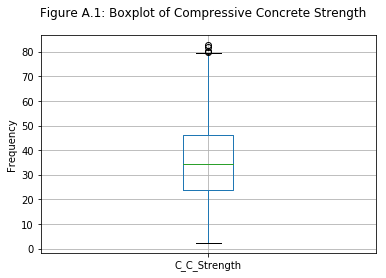

In [6]:
#Boxplot of Response variable Compressive Concrete Strength
df.boxplot(column =['C_C_Strength'], fontsize = 10)
plt.suptitle("Figure A.1: Boxplot of Compressive Concrete Strength")
plt.title("")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show>

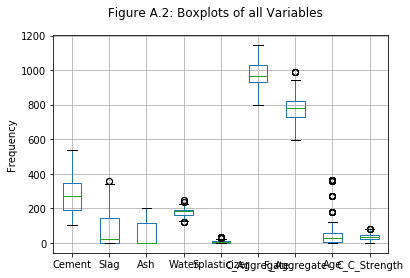

In [7]:
#Boxplot of all variables
df.boxplot(column =['Cement', 'Slag', 'Ash', 'Water', 'Splasticizer', 'C_Aggregate', 'F_Aggregate', 'Age', 'C_C_Strength'], fontsize = 10)
plt.suptitle("Figure A.2: Boxplots of all Variables")
plt.title("")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show>

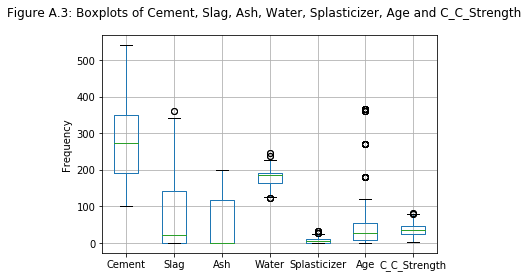

In [8]:
#Boxplot of variables with values below 600
df.boxplot(column =['Cement', 'Slag', 'Ash', 'Water','Splasticizer','Age', 'C_C_Strength'], fontsize = 10)
plt.suptitle("Figure A.3: Boxplots of Cement, Slag, Ash, Water, Splasticizer, Age and C_C_Strength")
plt.title("")
plt.ylabel("Frequency")
plt.show

<function matplotlib.pyplot.show>

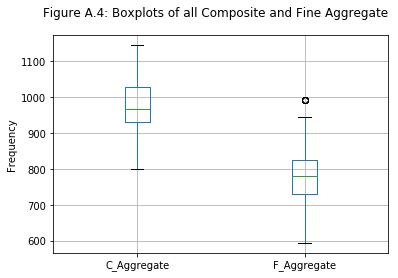

In [9]:
# Boxplot of variables with values above 600
df.boxplot(column =['C_Aggregate', 'F_Aggregate' ], fontsize = 10)
plt.suptitle("Figure A.4: Boxplots of all Composite and Fine Aggregate")
plt.title("")
plt.ylabel("Frequency")
plt.show

Given that Compressive Concrete Strength is the output variable, I plotted a violin plot and histogram of the Compressive Concrete Strength output variable to show how the data for this variable is distributed.  From the violin and histogram plots it seems that the data is slightly skewed to the left as most of the data falls between the 0 and 40 marks on the histogram. 

<function matplotlib.pyplot.show>

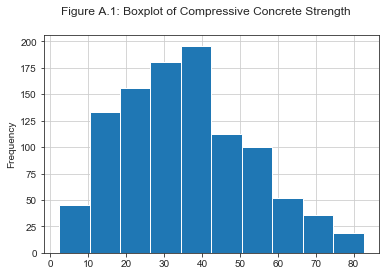

In [18]:
#Generation of histogram plot to illustrate distribution of Compressive Concrete Strength
df.hist(column =['C_C_Strength'])
plt.suptitle("Figure A.1: Boxplot of Compressive Concrete Strength")
plt.title("")
plt.ylabel("Frequency")
plt.show

/home/campus28/nrstoffe/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show>

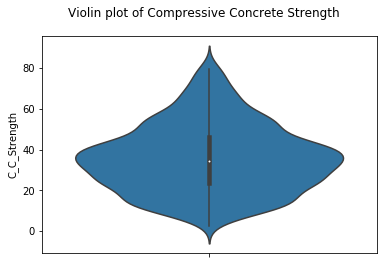

In [11]:
#Generation of violin plot to illustrate distribution of Compressive Concrete Strength
ccsplot = sns.violinplot(y='C_C_Strength', data=df)
plt.suptitle("Violin plot of Compressive Concrete Strength")
plt.title("")
plt.show
#ccsplot


## B ##
### Central Limit Theorem ###
From a given data set when numerous random samples are taken repeatedly, regardless of the distribution that the data follows originally, the repeated random samples will follow a normal distribution when combined.

## C ##

Mean Compressive Concrete Strength, mu = 35.817961165048544


Text(0.5,0,'Compressive Concrete Strength')

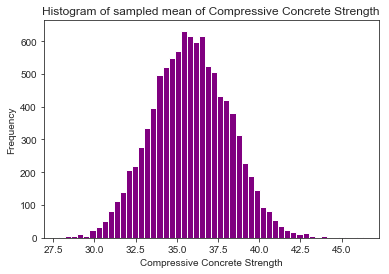

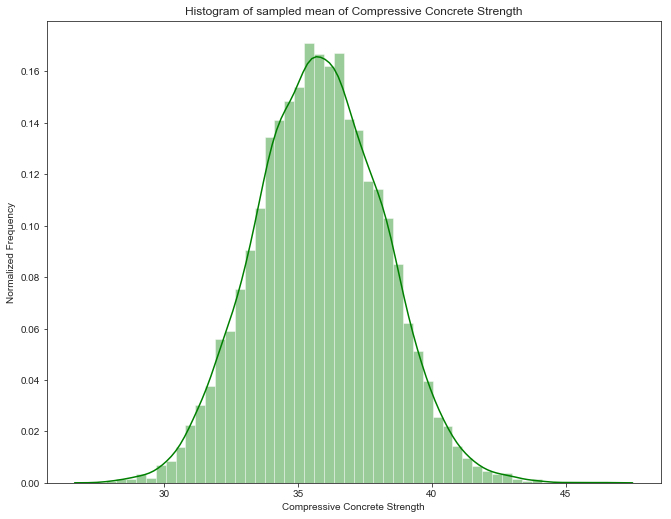

In [19]:
# Calculation of average value for the Compressive Concrete Strength variable
ccs_mu = df['C_C_Strength'].mean()

# Printing the average value for Compressive Concrete Strength with description
print("Mean Compressive Concrete Strength, mu = " + str(ccs_mu))

# Defining the number of tests to be run and with n=50 sample size
ntest = 10000
n = 50
ccs_means = [0] * ntest

# Creation of for loop to run the tests and record values
for i in range(ntest):
    obs = np.random.choice(df['C_C_Strength'].index.values,n)
    samp_dat = df['C_C_Strength'].loc[obs]
    ccs_means[i] = samp_dat.mean()
    
# Defining number of bins tha values can be assigned to     
nbins = 50

# Creation of histogram to show the sample data from above
_ = plt.hist(ccs_means, nbins, color= 'purple' )
plt.title('Histogram of sampled mean of Compressive Concrete Strength')
plt.ylabel("Frequency")
plt.xlabel("Compressive Concrete Strength")
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)

# Creation of histogram to show how the histogram relates to a normal distribution
sns.distplot(ccs_means, bins=nbins, color ='green')
plt.title('Histogram of sampled mean of Compressive Concrete Strength')
plt.ylabel("Normalized Frequency")
plt.xlabel("Compressive Concrete Strength")

Upon running the experiment the original data was skewed to the left, however the random samples acquired from multiple tests follow an approximately normal distribution.

## D

In [13]:
# calculation of mean for Compressive strength
mu = df['C_C_Strength'].mean()
# calculation of standard deviation for Compressive strength
sigma = df['C_C_Strength'].std()
print("mean = %g, sigma = %g"%(mu,sigma))

# taking a sample of size n=60 to test if the sample mean of compressive strength is less than 20MPs
n = 60
# MPs value we're testing for
xbar = 20
obs = np.random.choice(df['C_C_Strength'].index.values,n)
samp_dat = df['C_C_Strength'].loc[obs]
samplemu = samp_dat.mean()
# manual calculation using the z test as the sample size is large enough and the population standard deviation can be calculated
z = (xbar - samplemu) / (sigma/np.sqrt(n))

pvalue = (1-norm.cdf(np.abs(z)))

print "The probability that the sample mean of the comressive strength being less than 20MPs is %g"%(pvalue) 
print "When compared to a traditional statistical significance level of 0.05, this finding is statistically significant"

mean = 35.818, sigma = 16.7057
The probability that the sample mean of the comressive strength being less than 20MPs is 0
When compared to a traditional statistical significance level of 0.05, this finding is statistically significant


## E

In [14]:
#using built in percentile function in np to calculate the 70th upper percentile of the sample mean for compressive strength
perc70 = np.percentile(df['C_C_Strength'],70)
print "The 70th upper percentile of the sample mean for compressive strength is %g"%(perc70)

The 70th upper percentile of the sample mean for compressive strength is 43.289


## F 
The mean of the compressive strength is less than 35MPs:<br>
Concrete engineers are interested in the Compressive Strength of concrete, in particular is 35MPs a reasonable estimate? Test for a 99.9% Confidence Interval of the mean compressive strength by taking a sample of 90 observations.

<i>Ho: 35MPs is a reasonable value for Compressive Concrete Strength<br>
Ha: 35MPs is not a reasonable value for Compressive Concrete Strength</i><br>

In [15]:
# Listing of requirements from premise of the question, including alpha, mean, sigma, and sample size
alpha = 0.001
mu = df['C_C_Strength'].mean()
sigma = df['C_C_Strength'].std()
n = 90
se = sigma/np.sqrt(n)
print("alpha = %g, mean = %g, sigma = %g, sample size = %g"%(alpha,mu,sigma,n))
# running calculation of z table based confidence interval
z_a2 = norm.ppf(1-alpha/2)
conf = norm.cdf(z_a2)-norm.cdf(-z_a2)
confint = [mu - se*z_a2, mu + se*z_a2 ]
print "We are", 100*conf, "% confident that the interval = ",  confint,  "contains the mean."

alpha = 0.001, mean = 35.818, sigma = 16.7057, sample size = 90
We are 99.9 % confident that the interval =  [30.02354161449454, 41.61238071560255] contains the mean.


Given that 35MPs is contained within the confidence interval of [30.02354, 41.6124], 35MPs is a reasonable value for Compressive Concrete Strength.

## G
The mean compressive strength is at least 28MPs<br>
Concrete engineers are interested in Compressive Strength of concrete, in particular the standard compressive strength of concrete is 36MPs.  Upon taking a sample of 90 observations, is the sample mean of compressive strength for concrete 36MPS?<br>
<i>Ho: mu = 36MPs<br>
Ha: mu is not equal to 36MPs</i><br>

In [16]:
mu = df['C_C_Strength'].mean()
# calculation of standard deviation for Compressive strength
sigma = df['C_C_Strength'].std()
print("population mean = %g, sigma = %g"%(mu,sigma))
# sample size n=90
n = 90
obs = np.random.choice(df['C_C_Strength'].index.values,n)
samp_dat = df['C_C_Strength'].loc[obs]
xbar = samp_dat.mean()
# calculation of z score
z = ((xbar - 36)) / (sigma/np.sqrt(n))

print("sample mean = %g, z = %g"%(xbar,z))
# defining alpha and pval calculation
alpha = 0.05
pvalue = 2*(1-norm.cdf(np.abs(z)))
p1val = (1-norm.cdf(np.abs(z)))

print "The two sided p-value is %g"%(pvalue)
print "The single sided p-value is %g"%(p1val)
print "The alpha value we're using is %g"%(alpha)
# evaluating pval against statistical significance of alpha = 0.05
if (pvalue < alpha):
    print "We reject the null hypothesis"
else:
    print "we fail to reject the null hypothesis"

population mean = 35.818, sigma = 16.7057
sample mean = 33.5354, z = -1.39957
The two sided p-value is 0.161643
The single sided p-value is 0.0808213
The alpha value we're using is 0.05
we fail to reject the null hypothesis


The results of the hypothesis test show that after taking a sample of 90 observations, the sample standard compressive strength is not statistically different from 36MPs. 